# Task 01: Regional Flash Flood in Germany on 2021-07-14

In a confined stripe from the German-Dutch-Belgium border reaching North East extreme rainfall occurred between 2021-07-14 and 2021-07-15 having led to devastating flash floods in several small river catchments. The BBC gives a good overview of the catastrophy having caused many casualties and severe damage: [BBC News: _Germany floods: Where are the worst-hit areas?_](https://www.bbc.com/news/world-europe-57862894)



<img src="./images/QGIS_p01_Germany_Flood_p01.png" width=1000 /> <br>
_Fig.: RADOLAN spatial precipitation distribution accumulated between 2021-07-13T12:50UTC and 2021-07-15T12:55UTC (two days) <br> and the river catchments affected most by the extreme rain rates. The brightest pink areas showed a precipitation height above 80 mm._






## 1.1 Determine the catchment areas of the rivers Rur, Erft, Ahr, Wupper and Ruhr.

Determine the lengths of the rivers as well their catchment areas (aka river basin area). Fill the values into the CSV file [catchments.csv](catchments.csv) using any text editor. Use Wikipedia to get the information, e.g. for river Rur see 
[this link](https://en.wikipedia.org/wiki/Rur).

Read the file `catchment.csv` into a pandas dataframe. Make the column `River` the index. Rename the columns: "Length (km)" -> length , "Area (km^2)" -> area. Use a dictionary to perform the renaming.

Use matplotlib to create two vertical bar graphs for length and area, respectively.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
file1 = r'data\data_rivers.txt'

In [9]:
df_1 = pd.read_fwf (file1, sep = ';', index_col=['River']) #we use fixed width format here because
                                                           #the data in the file is separated using spaces only.
df_1.rename({'Length(km)': 'Length', 'Area(km^2)': 'Area'}, axis = 'columns', inplace=True)
df_1

,Length,Area
River,,
Rur,164.5,2361.000
Erft,106.6,1837.915
Ahr,89.0,900.000
Wupper,115.8,813.000
Ruhr,219.2,4485.000


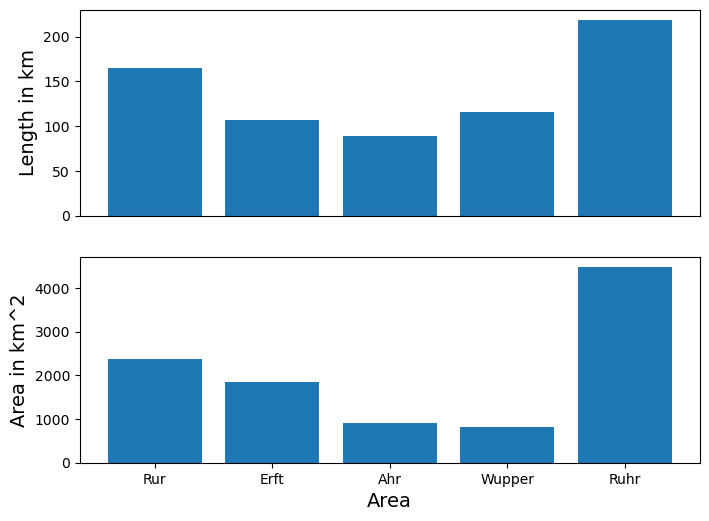

In [10]:
fig0 = plt.subplots(figsize = (8,6), dpi = 100)
x = range(5)
#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(2,1,1)

#This will create the bar graph for length
plt.bar(x, df_1['Length'])
plt.ylabel('Length in km', fontsize=14)
plt.xticks([],[])

#The below code will create the second plot.
plt.subplot(2,1,2)
#This will create the bar graph for area
plt.bar(x, df_1['Area'])
plt.ylabel('Area in km^2', fontsize=14)
plt.xlabel('Area', fontsize=14)

plt.xticks(x, df_1.index, rotation='horizontal')
plt.show()

## 1.2 Determine the cumulative precipitaion at some weather stations in the five catchments

The map below shows the DWD precipitation stations as listed in DWD station description [RR_Stundenwerte_Beschreibung_Stationen.txt](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/precipitation/recent/RR_Stundenwerte_Beschreibung_Stationen.txt).

Translation:<br>
RR (Regenrate): rain rate<br>
Stundenwerte: hourly values<br>
Beschreibung Stationen: description stations

<img src="./images/QGIS_p03_EZG_HW_Allt_Rain_Gauges.png" width=1000 /><br>
_Fig.: DWD precipitation stations with hourly resolution._
Data taken from DWD's [RR_Stundenwerte_Beschreibung_Stationen.txt](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/precipitation/recent/RR_Stundenwerte_Beschreibung_Stationen.txt) 


Unfortunately there are inconsistencies in the DWD data availability. According to RR_Stundenwerte_Beschreibung_Stationen.txt the following station should provide annual precipitation values at station 2500:

`02500 20040911 20210724            570     50.3953    6.9896 Kaltenborn, Hohe Acht                    Rheinland-Pfalz`

but the expected zip file containing the measurements for station 2500 as well as meta data is missing in the respective [download area](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/precipitation/recent/).

### 1.2.1 Analyse precipitation rates for at least one station per each of the five catchment areas.


**Limit the analysis to the the time interval catching the heavy rain events.** The interval `[2021-07-12T12:00+00, 2021-07-15T12:00+00]` should catch the event at all stations. If not then adjust the interval!

Select one precipitation station for each of the five considered catchment areas that meets the following conditions:
* The station is either in the Rur, Erft, Ahr, Wupper or Ruhr catchment,
* the station is in a heavy rain zone (bright pink),
* the station was continuously fully functional in the chosen time interval.

1. Add the selected station IDs for the catchments to the CSV file used before and re-read the extended CSV file to the respective dataframe.
1. **Merge the RR time series of the five selected stations in one pandas data frame named df_RR.** 
1. Plot the information in two ways:
    1. Use the **pandas series plot function** to create vertical bar graphs of rain rates. Plot all five graphs in one diagram. 
    1. Use seaborn to create a **heatmap** of df_RR.

Use the followng function to read a hourly precipitation time series into a pandas dataframe:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
from datetime import datetime
dateparse = lambda dates: [datetime.strptime(str(d), '%Y%m%d%H') for d in dates] #giving information to the system that
                                                                    #the dates are under year month date and hours format
df_Ahr = pd.read_csv(r'data/DWD/hourly/precipitation/recent/Ahr_stundenwerte_RR_03490_akt/Ahr_03490.txt',
                     index_col="MESS_DATUM", delimiter=";", encoding="cp1252", parse_dates = ["MESS_DATUM"],
                     date_parser = dateparse, na_values = [-999.0, -999])
#encoding= cp"1252" is used to fix the umlaut (vowel mutation) of the german letters.
#na-values is to give a value NA instead of the values given (-999.0, -999) 
df_Ahr_R = df_Ahr.loc['2021-07-12 12:00:00':'2021-07-15 12:00:00']
df_Ahr_R1 = df_Ahr_R.R1

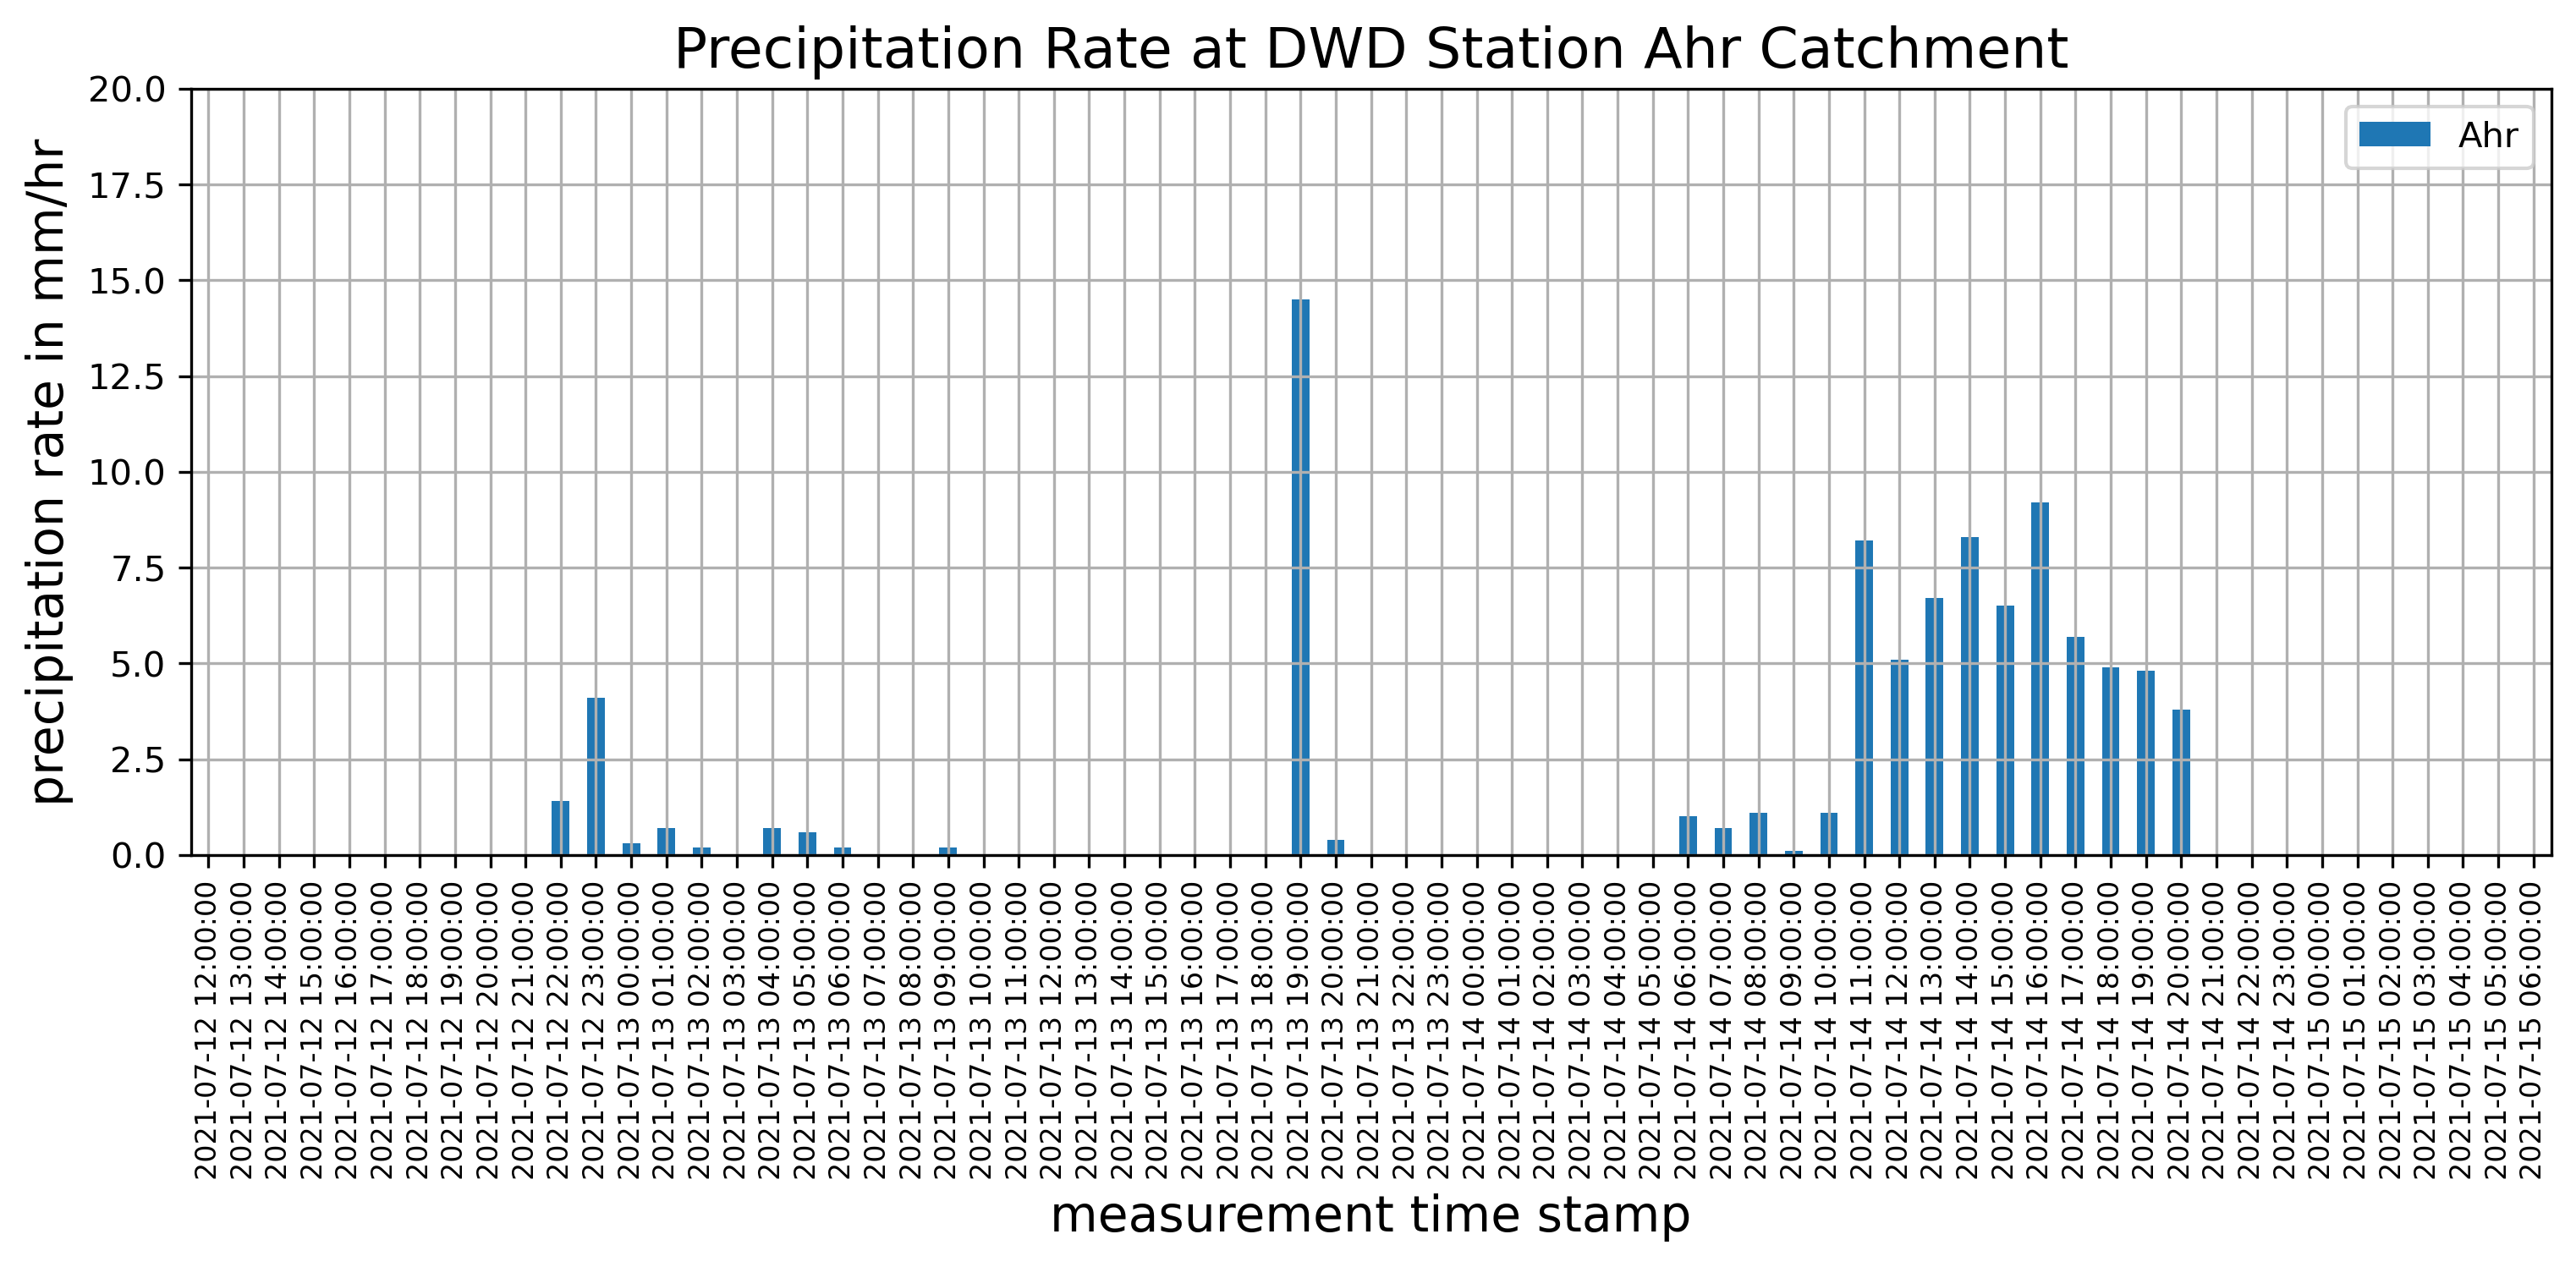

In [14]:
fig1 = plt.subplots(figsize=(12,4), dpi = 300)
ax = df_Ahr_R1.plot.bar(y='R1')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=90) #rotating the xticks to e vertically so we can read it properly
ax.grid(True) #set a grid when plottig
ax.set_ylim(0,20) #set the minimum and maximum value for y
ax.set_title("Precipitation Rate at DWD Station Ahr Catchment", fontsize=16)
ax.set_ylabel("precipitation rate in mm/hr", fontsize=14)
ax.set_xlabel("measurement time stamp", fontsize=14)
ax.legend(["Ahr"])
plt.show()

In [15]:
df_Erft = pd.read_csv(r'data/DWD/hourly/precipitation/recent/Erft_stundenwerte_RR_01327_akt/Erft_01327.txt',
                     index_col="MESS_DATUM", delimiter=";", encoding="cp1252", parse_dates = ["MESS_DATUM"],
                     date_parser = dateparse, na_values = [-999.0, -999])
df_Erft_R = df_Erft.loc['2021-07-12 12:00:00':'2021-07-15 12:00:00']
df_Erft_R1 = df_Erft_R.R1

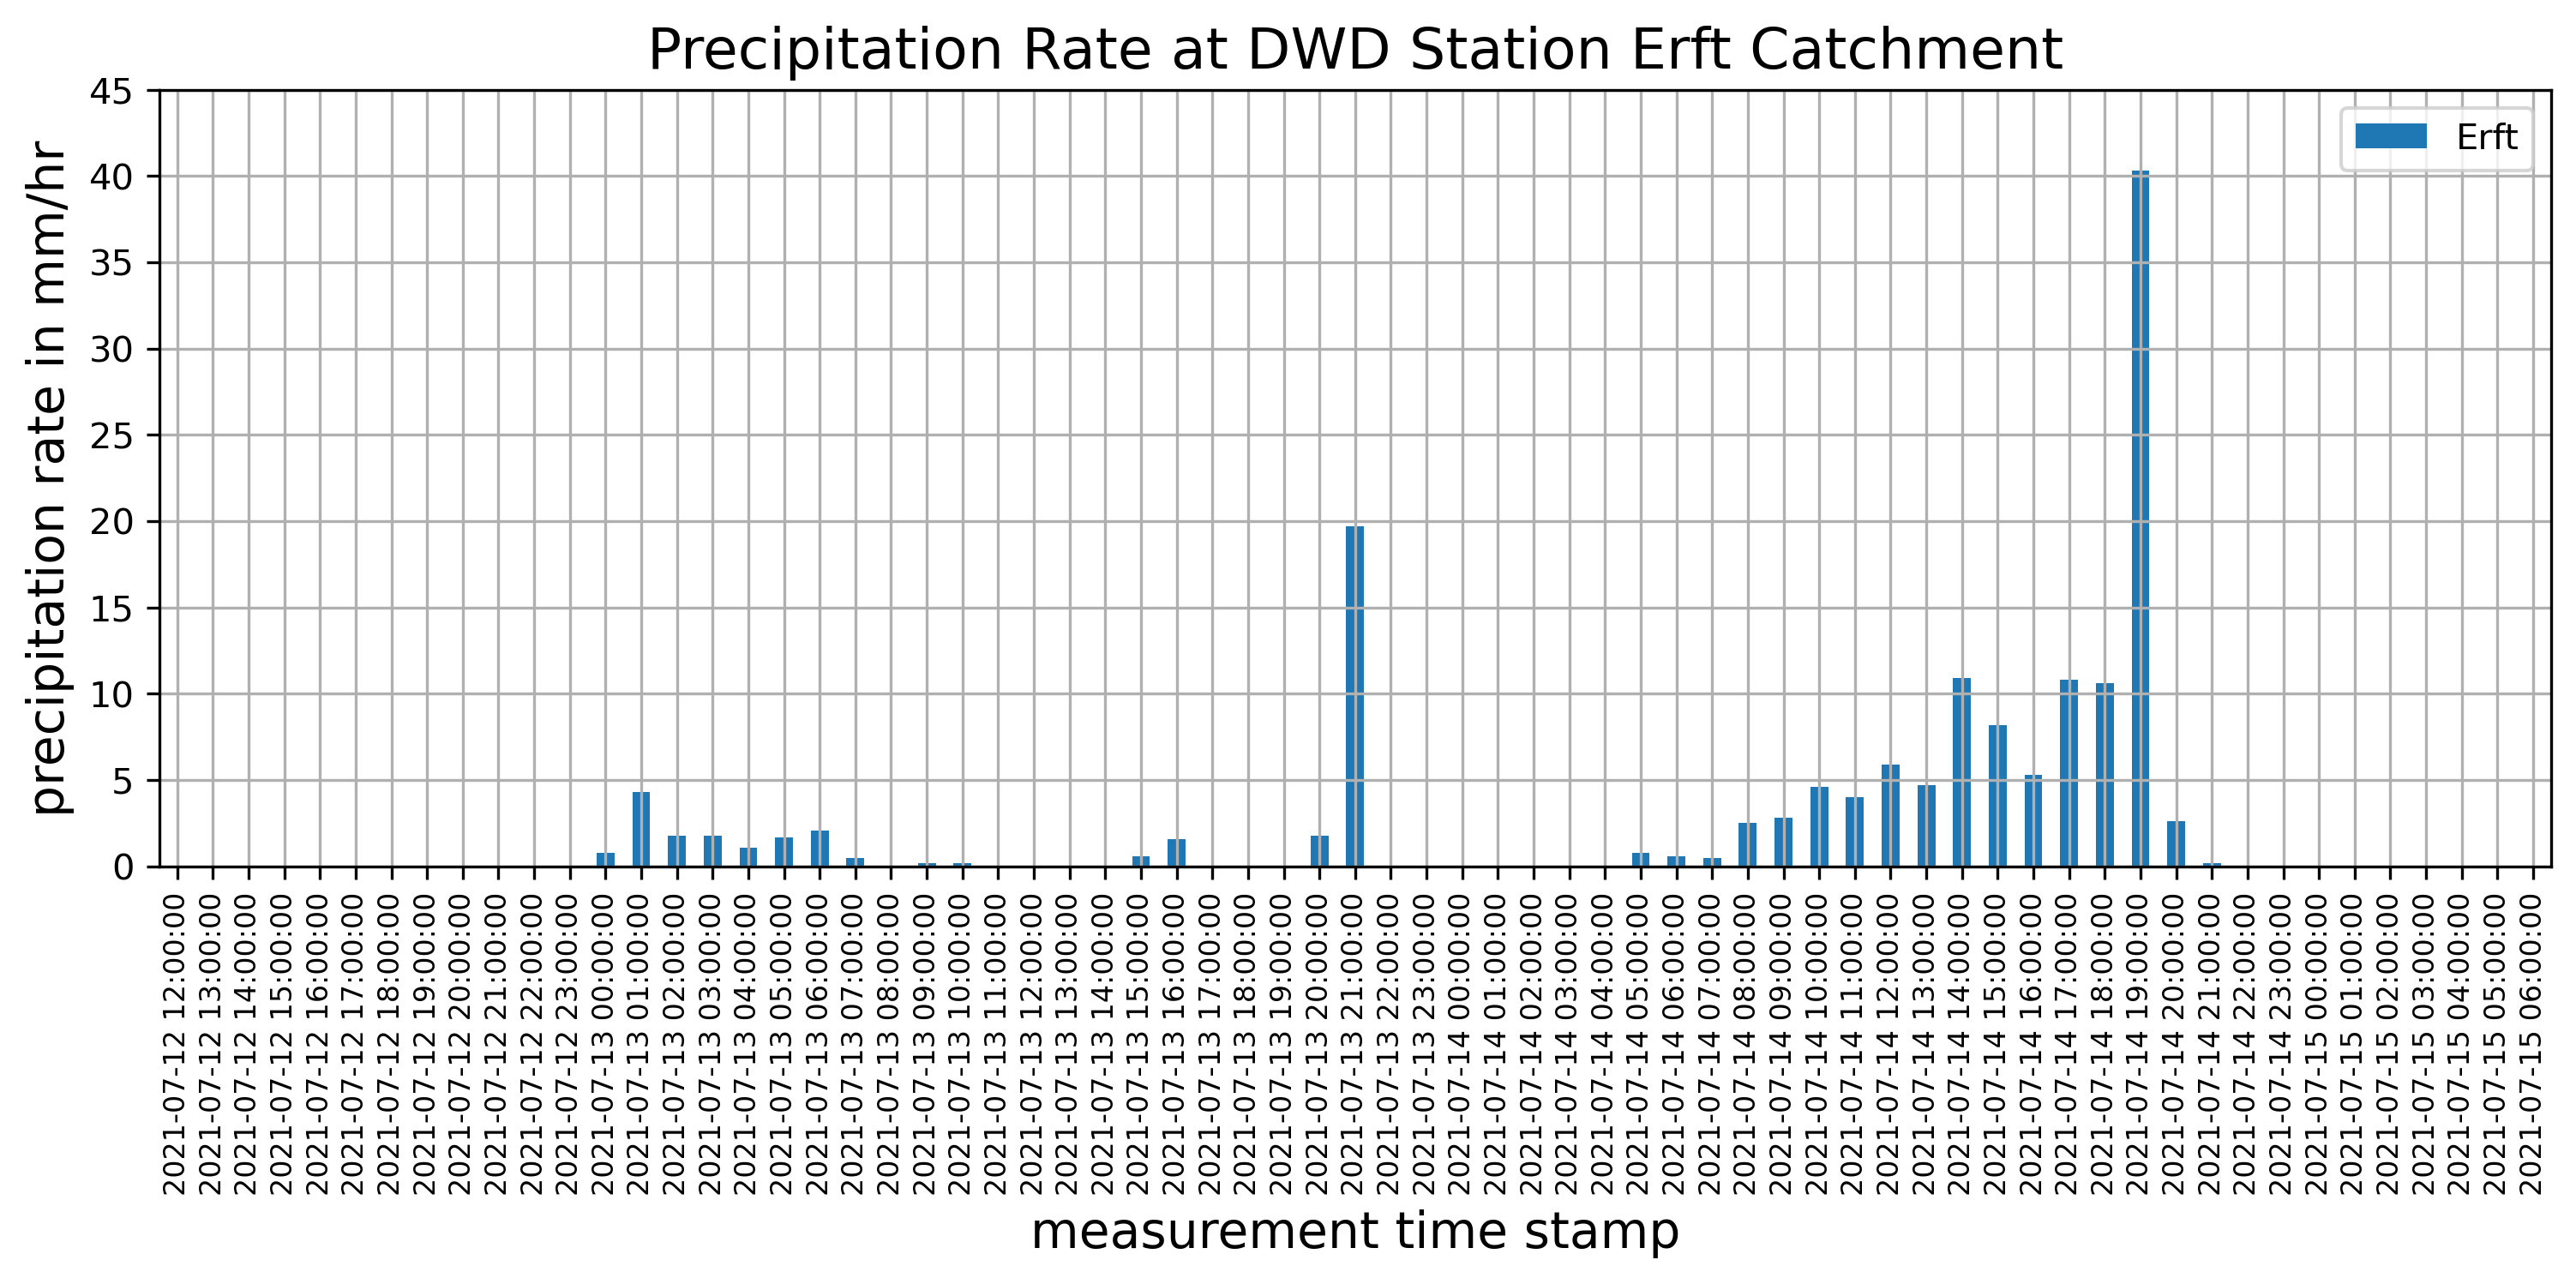

In [16]:
fig2 = plt.subplots(figsize=(12,4), dpi = 300)
ax = df_Erft_R1.plot.bar(y='R1')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=90)
ax.grid(True)
ax.set_ylim(0,45)
ax.set_title("Precipitation Rate at DWD Station Erft Catchment", fontsize=16)
ax.set_ylabel("precipitation rate in mm/hr", fontsize=14)
ax.set_xlabel("measurement time stamp", fontsize=14)
ax.legend(["Erft"])
plt.show()

In [17]:
df_Ruhr = pd.read_csv(r'data/DWD/hourly/precipitation/recent/Ruhr_stundenwerte_RR_01300_akt/Ruhr_01300.txt',
                     index_col="MESS_DATUM", delimiter=";", encoding="cp1252", parse_dates = ["MESS_DATUM"],
                     date_parser = dateparse, na_values = [-999.0, -999])
df_Ruhr_R = df_Ruhr.loc['2021-07-12 12:00:00':'2021-07-15 12:00:00']
df_Ruhr_R1 = df_Ruhr_R.R1

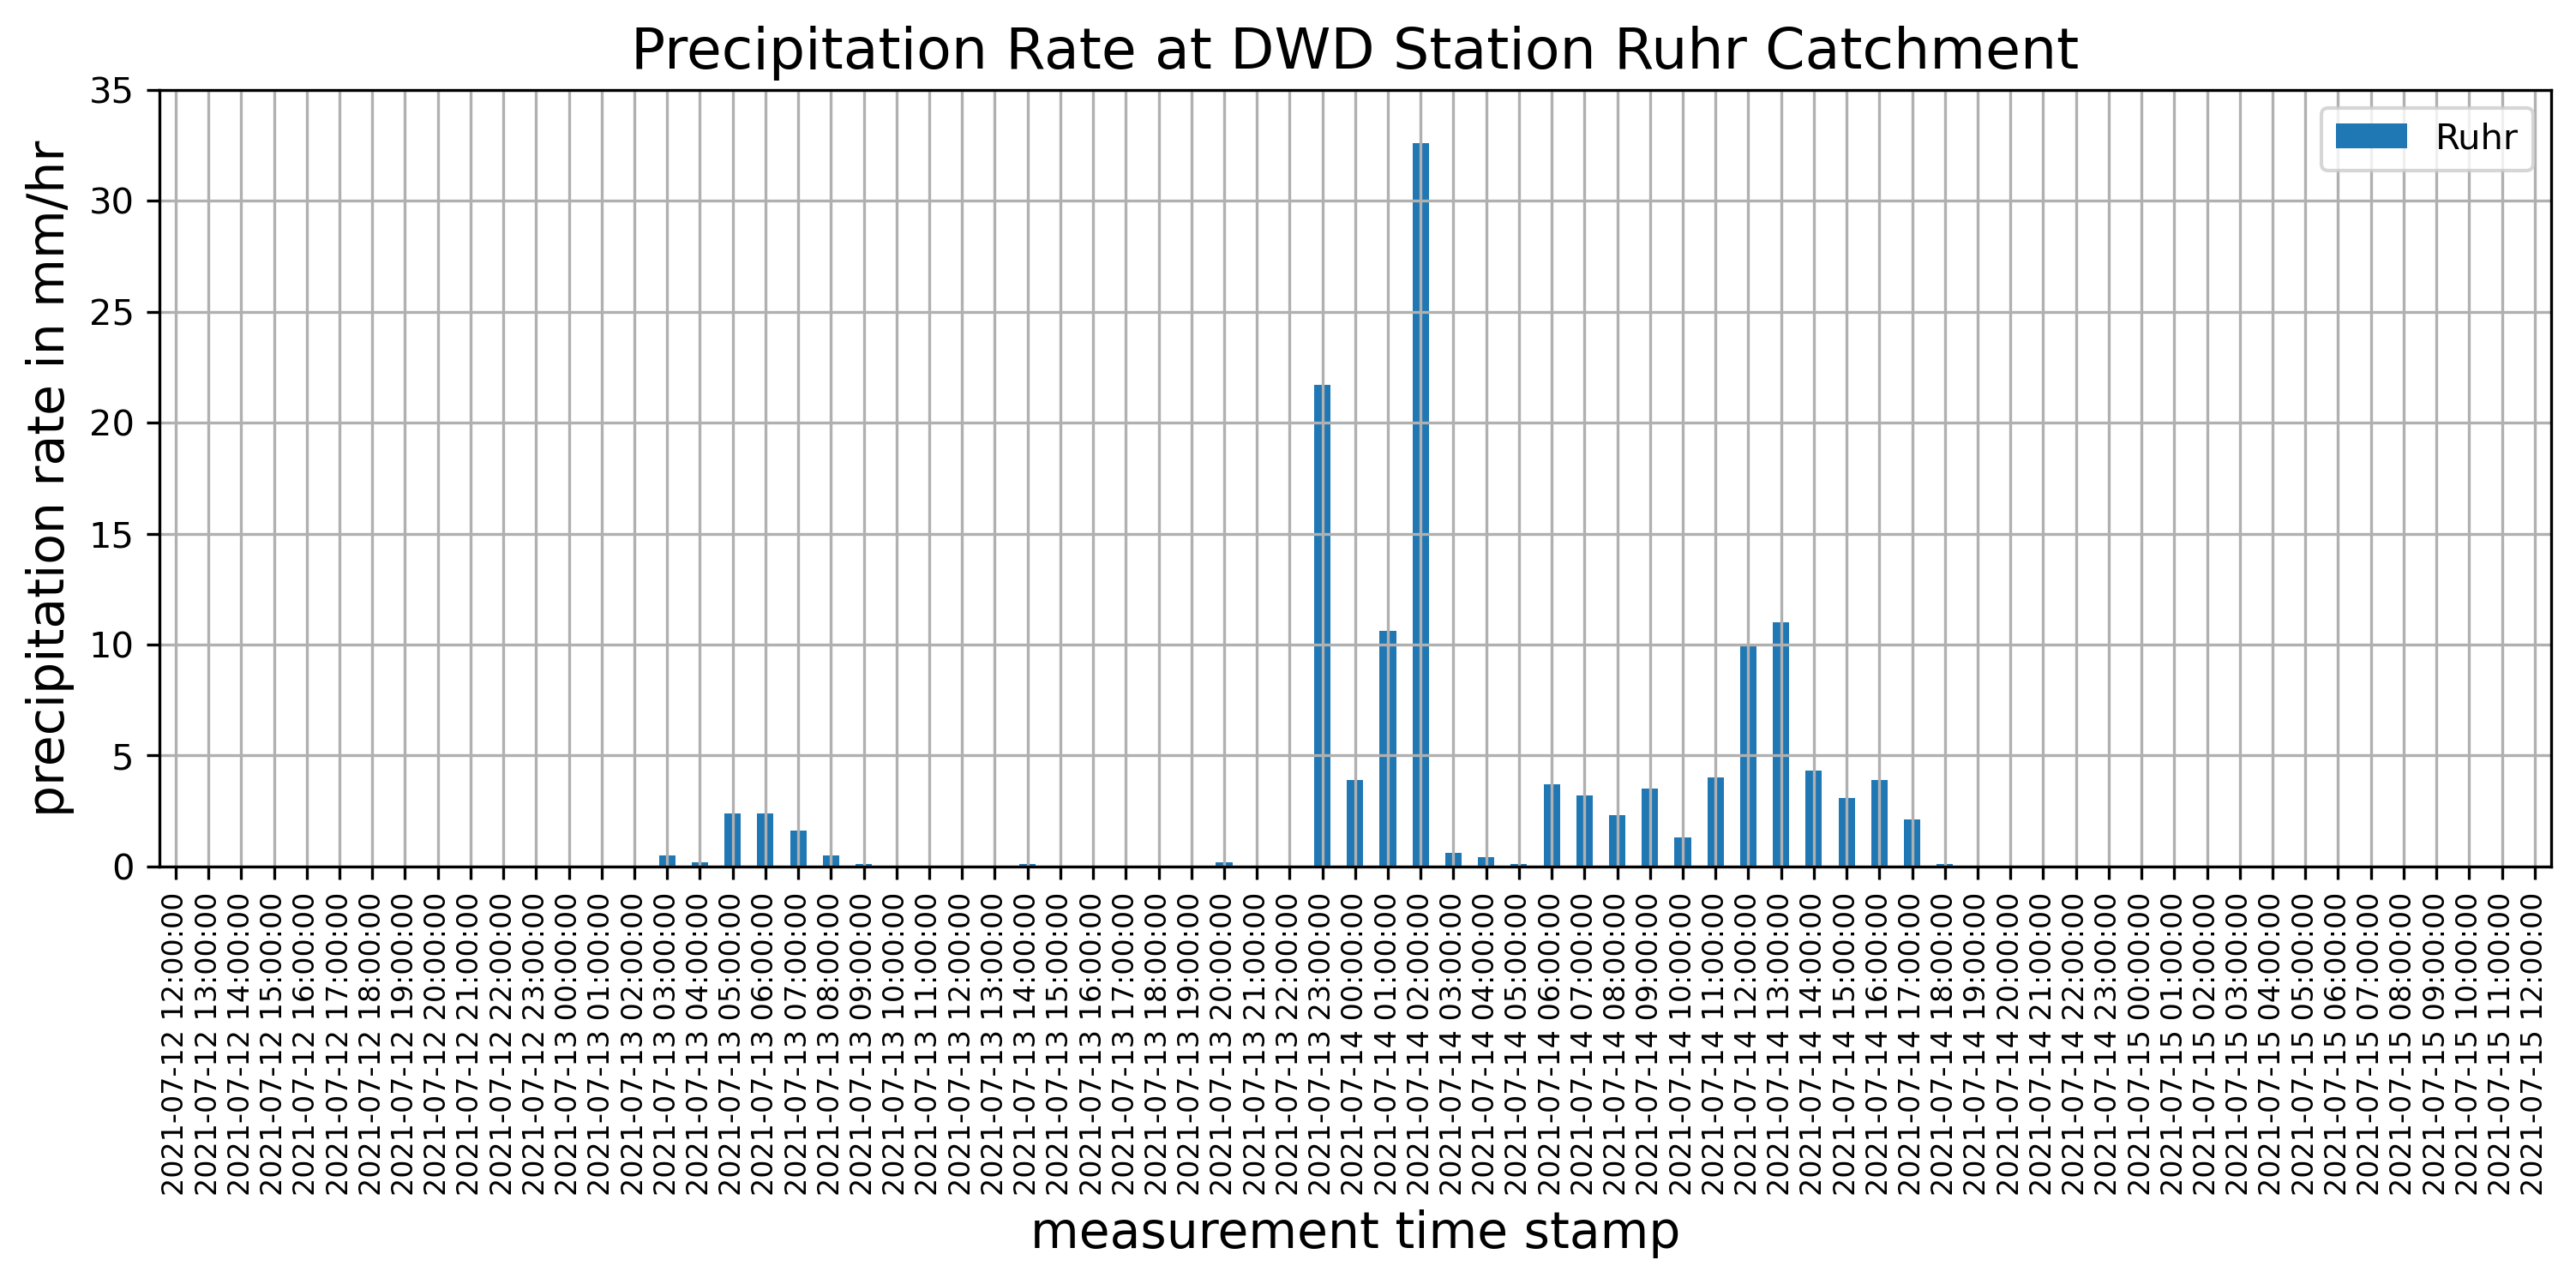

In [18]:
fig3 = plt.subplots(figsize=(12,4), dpi = 300)
ax = df_Ruhr_R1.plot.bar(y='R1')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=90)
ax.grid(True)
ax.set_ylim(0,35)
ax.set_title("Precipitation Rate at DWD Station Ruhr Catchment", fontsize = 16)
ax.set_ylabel("precipitation rate in mm/hr", fontsize = 14)
ax.set_xlabel("measurement time stamp", fontsize = 14)
ax.legend(["Ruhr"])
plt.show()

In [19]:
df_Rur = pd.read_csv(r'data/DWD/hourly/precipitation/recent/Rur_stundenwerte_RR_02110_akt/Rur_02110.txt',
                     index_col="MESS_DATUM", delimiter=";", encoding="cp1252", parse_dates = ["MESS_DATUM"],
                     date_parser = dateparse, na_values = [-999.0, -999])
df_Rur_R = df_Rur.loc['2021-07-12 12:00:00':'2021-07-15 12:00:00']
df_Rur_R1 = df_Rur_R.R1

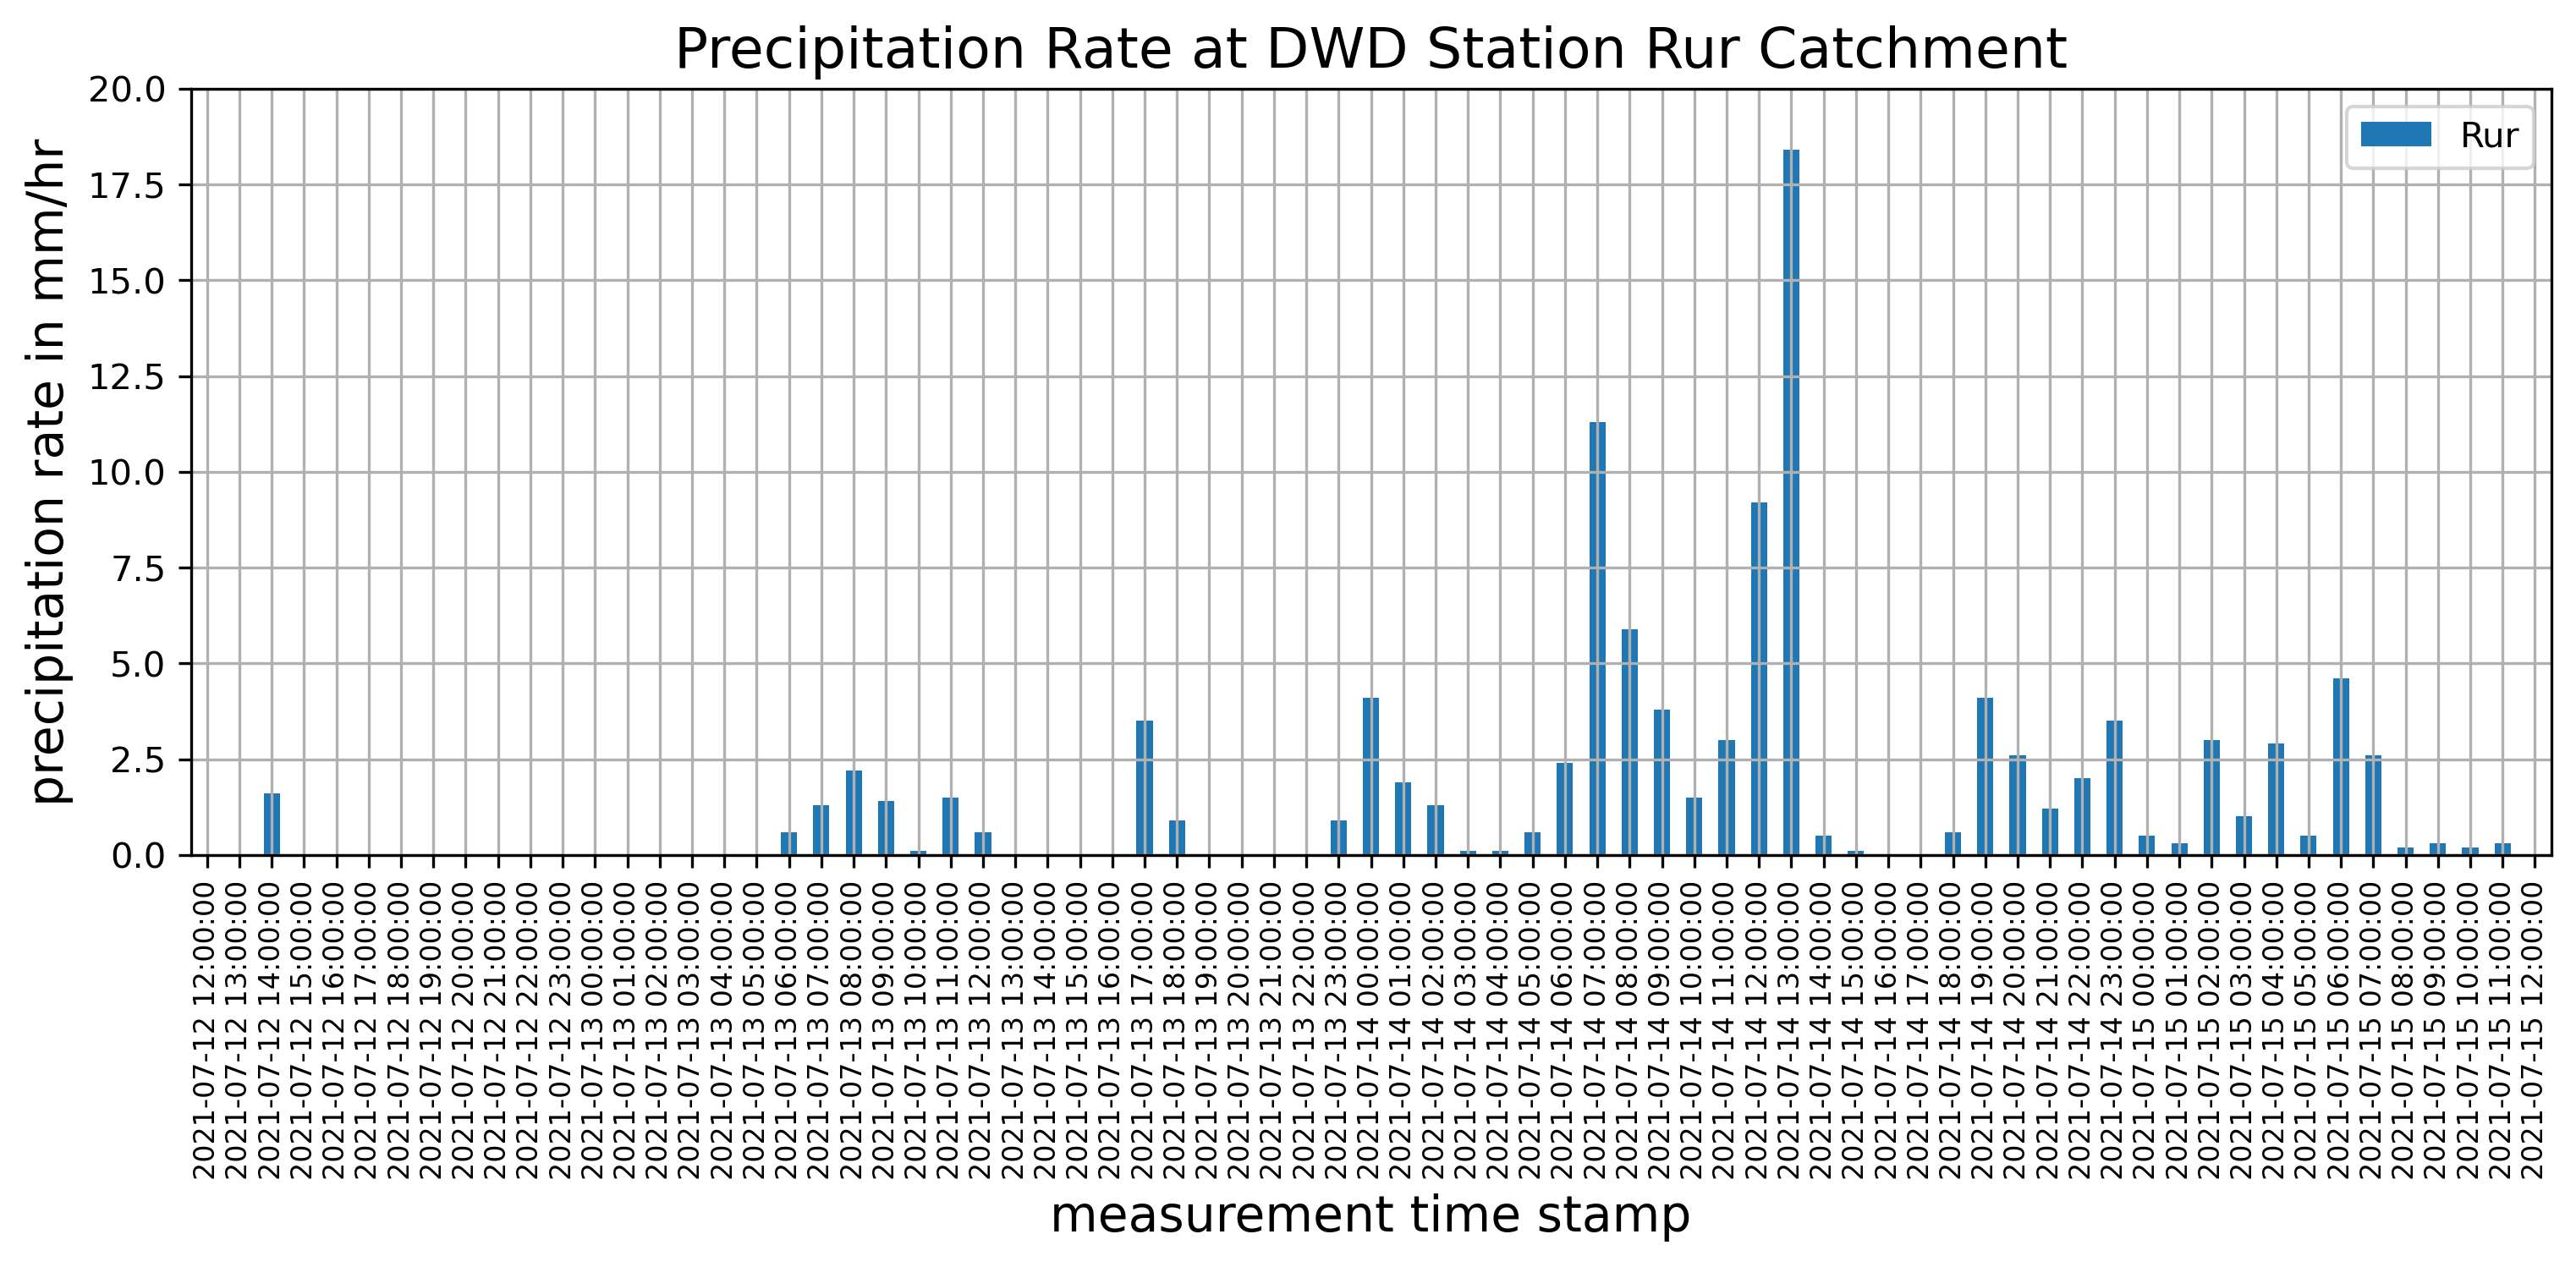

In [20]:
fig4 = plt.subplots(figsize=(12,4), dpi = 300)
ax = df_Rur_R1.plot.bar(y='R1')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=90)
ax.grid(True)
ax.set_ylim(0,20)
ax.set_title("Precipitation Rate at DWD Station Rur Catchment", fontsize = 16)
ax.set_ylabel("precipitation rate in mm/hr", fontsize = 14)
ax.set_xlabel("measurement time stamp", fontsize = 14)
ax.legend(["Rur"])
plt.show()

In [21]:
df_Wupper = pd.read_csv(r'data/DWD/hourly/precipitation/recent/Wupper_stundenwerte_RR_05619_akt/Wupper_05619.txt',
                     index_col="MESS_DATUM", delimiter=";", encoding="cp1252", parse_dates = ["MESS_DATUM"],
                     date_parser = dateparse, na_values = [-999.0, -999])
df_Wupper_R = df_Wupper.loc['2021-07-12 12:00:00':'2021-07-15 12:00:00']
df_Wupper_R1 = df_Wupper_R.R1

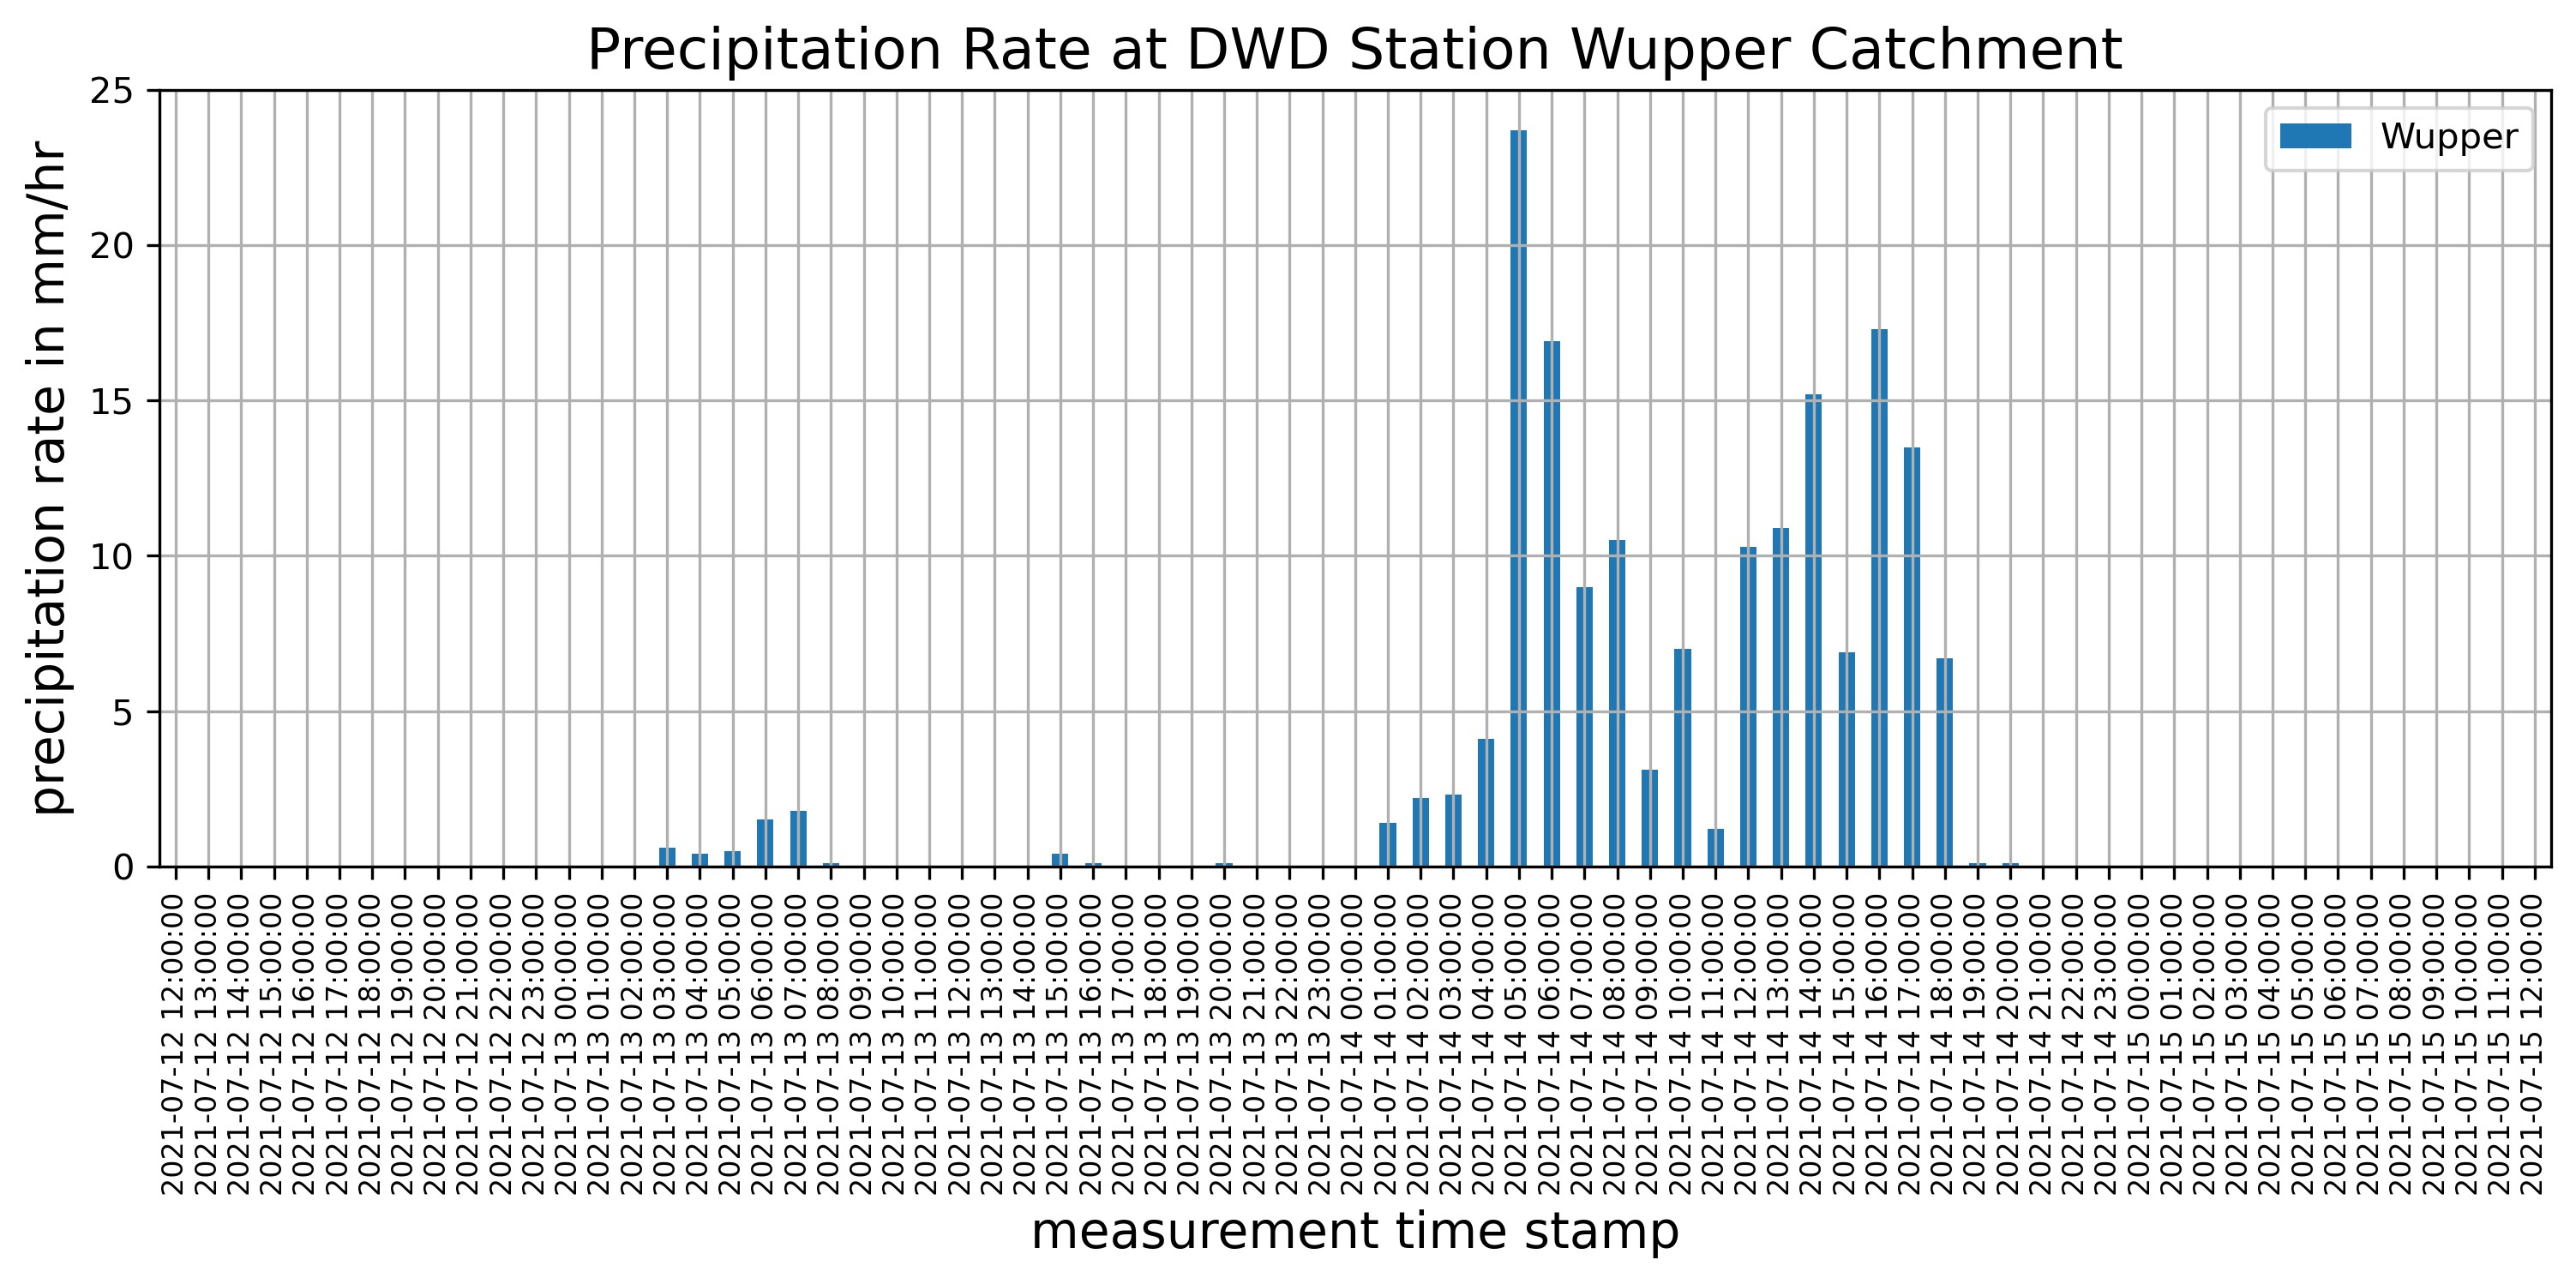

In [22]:
fig5 = plt.subplots(figsize=(12,4), dpi = 300)
ax = df_Wupper_R1.plot.bar(y='R1')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=90)
ax.grid(True)
ax.set_ylim(0,25)
ax.set_title("Precipitation Rate at DWD Station Wupper Catchment", fontsize = 16)
ax.set_ylabel("precipitation rate in mm/hr", fontsize = 14)
ax.set_xlabel("measurement time stamp", fontsize = 14)
ax.legend(["Wupper"])
plt.show()

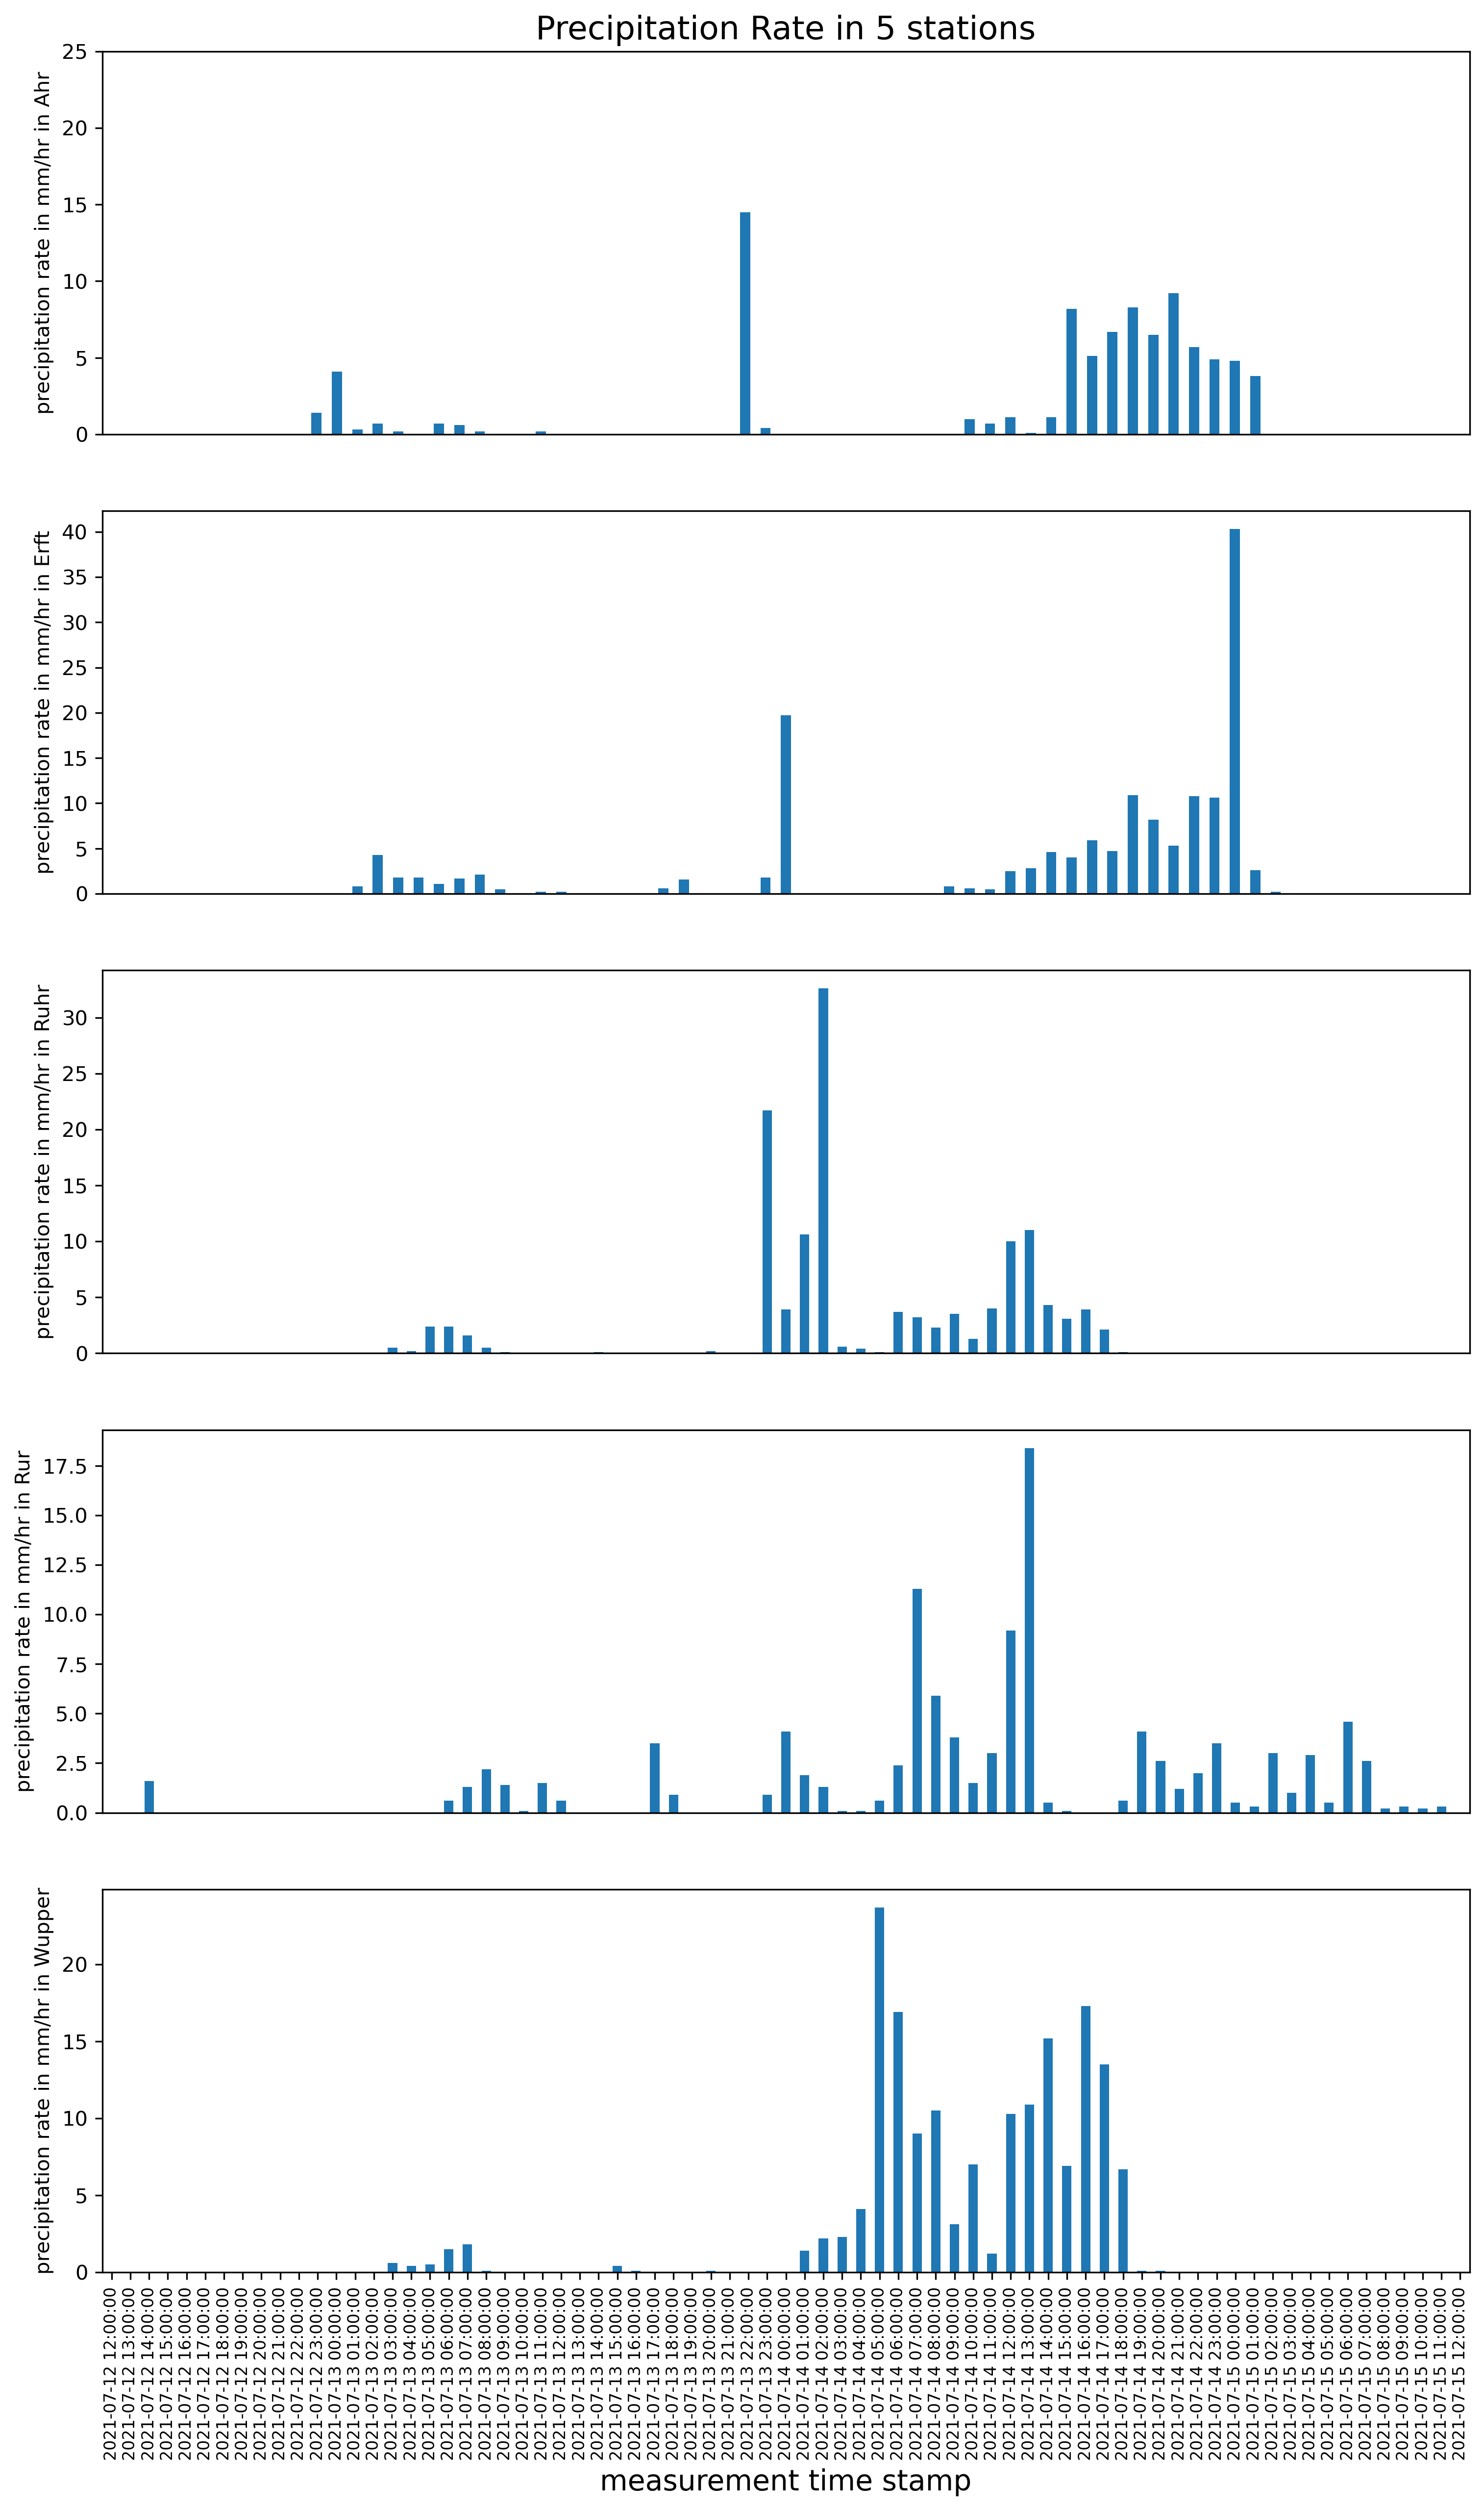

In [23]:
fig6 = plt.subplots(figsize = (12,20), dpi = 300)
x = range(5)

#The below code will create many plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(5,1,1)

#This will create the bar graph for precipitation
ax = df_Ahr_R1.plot.bar(y='R1')
ax.set_ylabel("precipitation rate in mm/hr in Ahr", fontsize = 10)
ax.set_xlabel("")
ax.set_title("Precipitation Rate in 5 stations", fontsize = 16)
plt.xticks([],[])
ax.set_ylim(0,25)

#The below code will create the second plot.
plt.subplot(5,1,2)
#This will create the bar graph for precipitation
ax = df_Erft_R1.plot.bar(y='R1')
ax.set_ylabel("precipitation rate in mm/hr in Erft", fontsize = 10)
ax.set_xlabel("")
plt.xticks([],[])

plt.subplot(5,1,3)
ax = df_Ruhr_R1.plot.bar(y='R1')
ax.set_ylabel("precipitation rate in mm/hr in Ruhr", fontsize = 10)
ax.set_xlabel("")
plt.xticks([],[])


plt.subplot(5,1,4)
ax = df_Rur_R1.plot.bar(y='R1')
ax.set_ylabel("precipitation rate in mm/hr in Rur", fontsize = 10)
ax.set_xlabel("")
plt.xticks([],[])

plt.subplot(5,1,5)
ax = df_Wupper_R1.plot.bar(y='R1')
ax.set_ylabel("precipitation rate in mm/hr in Wupper", fontsize = 10)
ax.set_xlabel("measurement time stamp", fontsize=14)
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=90)

plt.show()

**The `R1` series (dataframe column) contains the rain rate time series! Extract the R1 series of all five dataframes, convert each series to a dataframe containing only R1 with the station ID being the column name and merge the R1 dataframes to one big dataframe with five columns and the same DateTimeIndex. Use an outer join in the merge operation to be save. This operation is not shown here! We have done it in the lecture!**

In [24]:
df_merge1 = pd.merge(df_Ahr_R1,df_Erft_R1, on = "MESS_DATUM", how = "outer") #outer merge for data frames

In [25]:
df_merge2 = pd.merge(df_Ruhr_R1,df_Rur_R1, on = "MESS_DATUM", how = "outer")

In [26]:
df_merge3 = pd.merge(df_merge1, df_merge2, on = "MESS_DATUM", how = "outer") #outer merging the final results together

In [27]:
df_R = pd.merge(df_merge3, df_Wupper_R1, on = "MESS_DATUM", how = "outer")

In [28]:
df_RR = df_R.rename(columns={"R1_x_x": "Ahr", "R1_y_x": "Erft", "R1_x_y": "Ruhr", "R1_y_y": "Rur", "R1": "Wupper"})
df_RR

,Ahr,Erft,Ruhr,Rur,Wupper
MESS_DATUM,,,,,
2021-07-12 12:00:00,0.0,0.0,0.0,0.0,0.0
2021-07-12 13:00:00,0.0,0.0,0.0,0.0,0.0
2021-07-12 14:00:00,0.0,0.0,0.0,1.6,0.0
2021-07-12 15:00:00,0.0,0.0,0.0,0.0,0.0
2021-07-12 16:00:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2021-07-15 08:00:00,NaN,NaN,0.0,0.2,0.0
2021-07-15 09:00:00,NaN,NaN,0.0,0.3,0.0
2021-07-15 10:00:00,NaN,NaN,0.0,0.2,0.0


In [29]:
from datetime import datetime
dateparse = lambda dates: [datetime.strptime(str(d), '%Y%m%d%H') for d in dates]

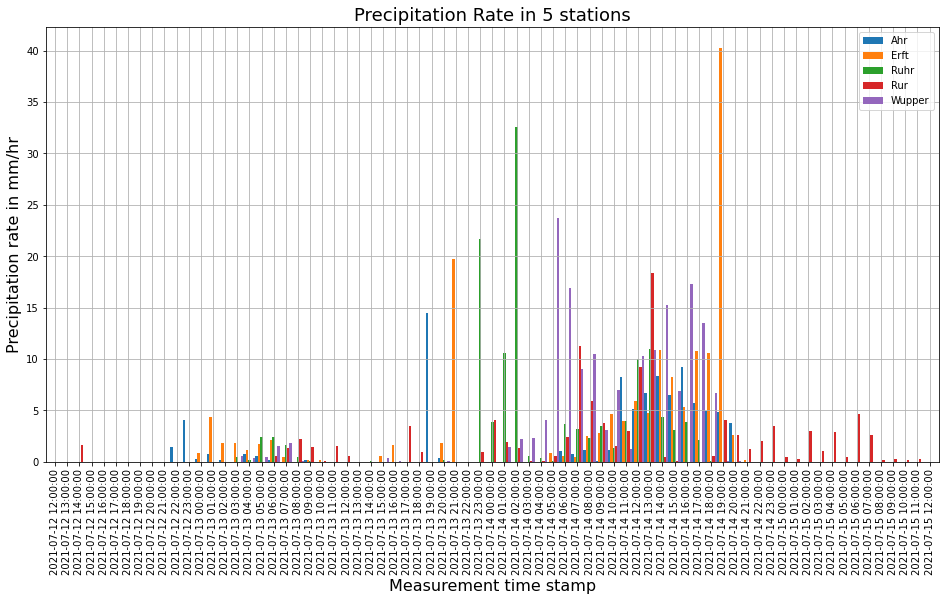

In [30]:
fig9 = ax = pd.DataFrame(df_RR,columns=["Ahr", "Erft", "Ruhr", "Rur", "Wupper"])
df_RR.plot(y=["Ahr", "Erft", "Ruhr", "Rur", "Wupper"], kind="bar", width = 1, figsize=(16,8), grid = True)
plt.xlabel('Measurement time stamp', fontsize=16)
plt.ylabel('Precipitation rate in mm/hr', fontsize=16)
plt.title("Precipitation Rate in 5 stations", fontsize = 18)

plt.show()

In [31]:
import seaborn as sns

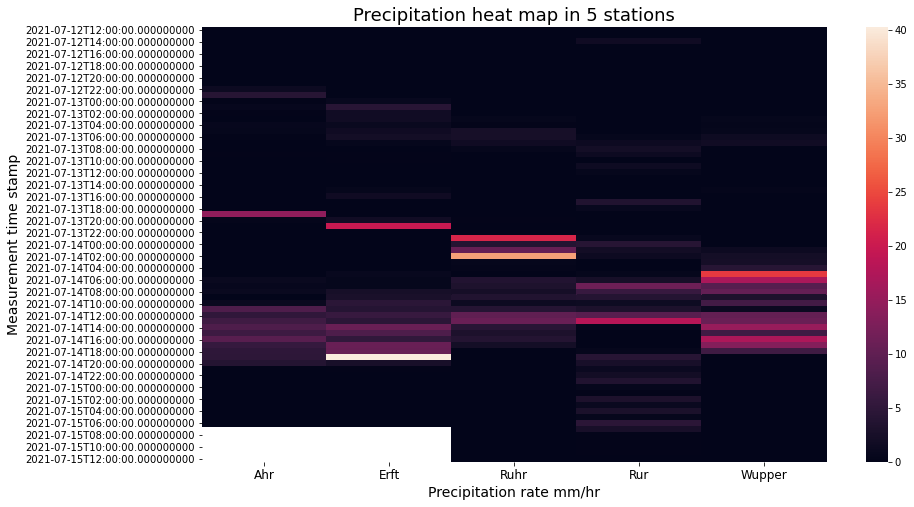

In [32]:
plt.figure(figsize=(14, 8))
heat_map = sns.heatmap((df_RR)[['Ahr','Erft', 'Ruhr', 'Rur', 'Wupper']])
plt.ylabel('Measurement time stamp', fontsize=14)
plt.xlabel('Precipitation rate mm/hr', fontsize=14)
plt.title("Precipitation heat map in 5 stations", fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 10)
plt.show()

**Add the selected station IDs for the catchments to the CSV file used before and re-read the extended CSV file to the respective dataframe.**

In [33]:
df_2 = pd.read_csv(r'data/5_stations_merged.txt',
                   index_col="MESS_DATUM", delimiter=";", encoding="cp1252", parse_dates = ["MESS_DATUM"],
                   date_parser = dateparse, na_values = [-999.0, -999])

In [34]:
df_RR2 = df_2.loc['2021-07-12 12:00:00':'2021-07-15 12:00:00']
df_RR2

,STATIONS_ID,QN_8,R1,RS_IND,WRTR,eor
MESS_DATUM,,,,,,
2021-07-12 12:00:00,3660,1,0.0,1.0,NaN,eor
2021-07-12 13:00:00,3660,1,0.0,1.0,6.0,eor
2021-07-12 14:00:00,3660,1,0.0,1.0,6.0,eor
2021-07-12 15:00:00,3660,1,0.0,1.0,NaN,eor
2021-07-12 16:00:00,3660,1,0.0,1.0,6.0,eor
...,...,...,...,...,...,...
2021-07-15 08:00:00,5619,1,0.0,0.0,NaN,eor
2021-07-15 09:00:00,5619,1,0.0,0.0,NaN,eor
2021-07-15 10:00:00,5619,1,0.0,0.0,NaN,eor


In [35]:
df_R3 = df_RR2.R1
df_R3

MESS_DATUM
2021-07-12 12:00:00    0.0
2021-07-12 13:00:00    0.0
2021-07-12 14:00:00    0.0
2021-07-12 15:00:00    0.0
2021-07-12 16:00:00    0.0
                      ... 
2021-07-15 08:00:00    0.0
2021-07-15 09:00:00    0.0
2021-07-15 10:00:00    0.0
2021-07-15 11:00:00    0.0
2021-07-15 12:00:00    0.0
Name: R1, Length: 339, dtype: float64

### 1.2.2 Determine the cumulative precipitation.

Use the function `cumsum()` to aggregate the precipitation time series gathered in df_RR. You can use either the [pandas version](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html) or the [numpy version](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html). In fact cumsum() integrates the rain rate over time. It yields the growth of precipitation height (collected volume of water) over time. 

1. Plot the five cumulative precipitation sums as line graphs in one figure. 
1. Add another column for the total precipitation height of the event to the CSV file and fill it with any text editor.  
1. Do you see a temporal shift between the step edges of strongly increasing precipitation? Can you order the stations according to the time of onset of heavy rain? Can you derive the motion of the rain event from this information? (I (RB) don't know. I have not tried it, yet.)

In [36]:
df_RR['Ahr_cumsum'] = df_RR['Ahr'].cumsum().shift(1)
df_RR['Erft_cumsum'] = df_RR['Erft'].cumsum().shift(1)
df_RR['Ruhr_cumsum'] = df_RR['Ruhr'].cumsum().shift(1)
df_RR['Rur_cumsum'] = df_RR['Rur'].cumsum().shift(1)
df_RR['Wupper_cumsum'] = df_RR['Wupper'].cumsum().shift(1)
df_RR

,Ahr,Erft,Ruhr,Rur,Wupper,Ahr_cumsum,Erft_cumsum,Ruhr_cumsum,Rur_cumsum,Wupper_cumsum
MESS_DATUM,,,,,,,,,,
2021-07-12 12:00:00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2021-07-12 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-12 14:00:00,0.0,0.0,0.0,1.6,0.0,0.0,0.0,0.0,0.0,0.0
2021-07-12 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,0.0
2021-07-12 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-15 08:00:00,NaN,NaN,0.0,0.2,0.0,NaN,NaN,130.4,108.2,167.9
2021-07-15 09:00:00,NaN,NaN,0.0,0.3,0.0,NaN,NaN,130.4,108.4,167.9
2021-07-15 10:00:00,NaN,NaN,0.0,0.2,0.0,NaN,NaN,130.4,108.7,167.9


In [37]:
cols = [5,6,7,8,9] #so we can extract only the cumulative columns
df_RR_cm = df_RR[df_RR.columns[cols]]
df_RR_cm

,Ahr_cumsum,Erft_cumsum,Ruhr_cumsum,Rur_cumsum,Wupper_cumsum
MESS_DATUM,,,,,
2021-07-12 12:00:00,NaN,NaN,NaN,NaN,NaN
2021-07-12 13:00:00,0.0,0.0,0.0,0.0,0.0
2021-07-12 14:00:00,0.0,0.0,0.0,0.0,0.0
2021-07-12 15:00:00,0.0,0.0,0.0,1.6,0.0
2021-07-12 16:00:00,0.0,0.0,0.0,1.6,0.0
...,...,...,...,...,...
2021-07-15 08:00:00,NaN,NaN,130.4,108.2,167.9
2021-07-15 09:00:00,NaN,NaN,130.4,108.4,167.9
2021-07-15 10:00:00,NaN,NaN,130.4,108.7,167.9


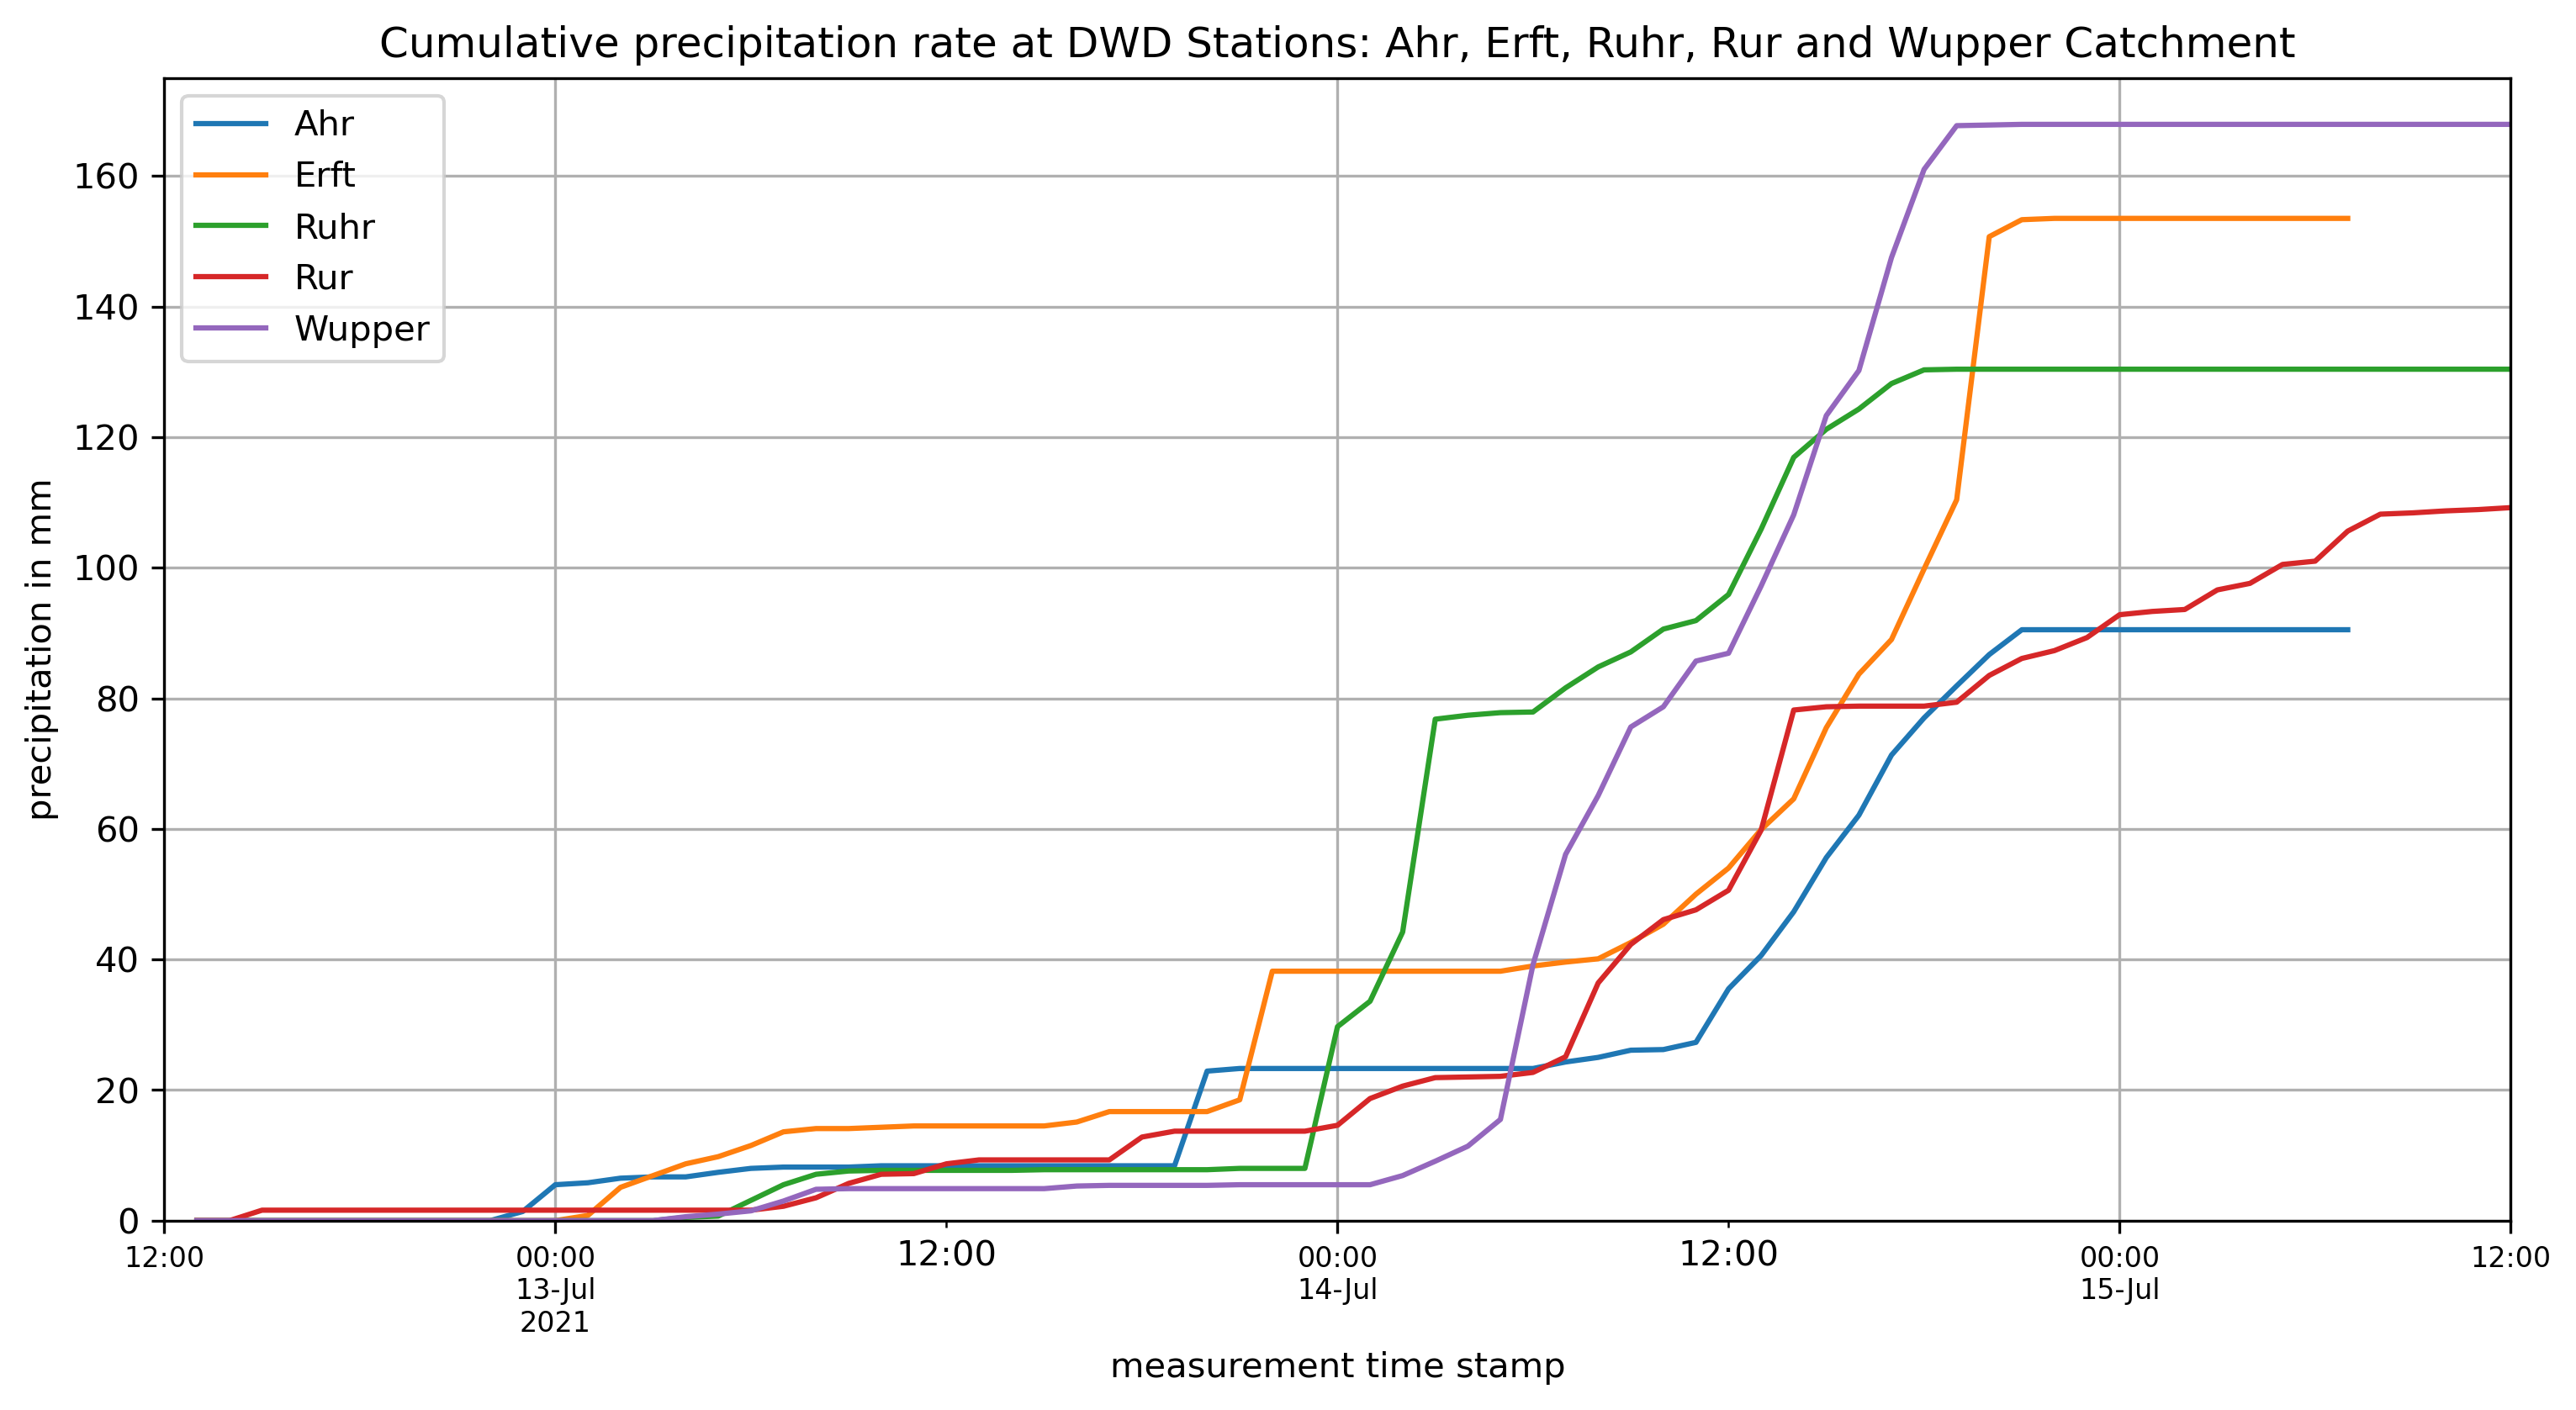

In [38]:
fig10, ax10 = plt.subplots(figsize = (12,6), dpi = 300)
df_RR_cm.plot.line(ax = ax10)
ax10.tick_params(axis='x', labelsize=8)
ax10.grid(True)
ax10.set_ylim(0,175)
ax10.set_title("Cumulative precipitation rate at DWD Stations: Ahr, Erft, Ruhr, Rur and Wupper Catchment")
ax10.set_ylabel("precipitation in mm")
ax10.set_xlabel("measurement time stamp")
ax10.legend(["Ahr", "Erft", "Ruhr", "Rur", "Wupper"])
plt.show()

In [39]:
df_RR_cm.to_excel("output1.xlsx")

**Add another column for the total precipitation height of the event to the CSV file and fill it with any text editor.**

This step is done in excel and the file name is output-cumulative.xlsx in the data folder

### 1.2.3 Compare this event to typical precipitation sums in July as well as annual precipitation.

Use **only one station** of your collection.

Compare the cumulative precipitation height of the analysed heavy rain event (amount of total rain fallen during the event) to the average July precipitation of the years 1961 to 1990 of the selected station. Of course, you have to choose a station from your collection of five stations which provides that historical data over 30 years. Use the monthly precipitation time series from the KL data ensemble: https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/monthly/kl/historical/

1. What is the ratio of event and average July precipitation height? 
1. What is the mean annual precipitation at your selected station for the years 1961 to 1990? What is the proportion of the event precipitation sum on the historical long term average?


In [40]:
from datetime import datetime
dateparse1 = lambda dates: [datetime.strptime(str(m), '%Y%m%d') for m in dates]
df_Wupper_monthly = pd.read_csv(r'data/DWD/hourly/precipitation/recent/Wupper_monthly_RR_05619/produkt_nieder_monat_18980101_20201231_05619.txt',
                     index_col="MESS_DATUM_BEGINN", delimiter=";", encoding="cp1252", parse_dates = ["MESS_DATUM_BEGINN"],
                     date_parser = dateparse1, na_values = [-999.0, -999])
df_Wupper_monthly_1 = df_Wupper_monthly.MO_RR.loc['1961-01-01':'1990-12-01']

df_Wupper_monthly_1

MESS_DATUM_BEGINN
1961-01-01    157.4
1961-02-01    119.5
1961-03-01     98.9
1961-04-01    133.2
1961-05-01     79.5
              ...  
1990-08-01    105.9
1990-09-01    115.3
1990-10-01     95.5
1990-11-01    162.1
1990-12-01    176.2
Name: MO_RR, Length: 360, dtype: float64

In [41]:
df_july = df_Wupper_monthly_1[df_Wupper_monthly_1.index.month.isin([7])]
print (df_july) #precipitation of July month between 1961 and 1990

MESS_DATUM_BEGINN
1961-07-01    159.3
1962-07-01    128.7
1963-07-01     49.3
1964-07-01     57.9
1965-07-01    274.3
1966-07-01    198.7
1967-07-01     79.2
1968-07-01     98.1
1969-07-01     90.3
1970-07-01    226.2
1971-07-01     21.7
1972-07-01    143.3
1973-07-01     56.5
1974-07-01    137.2
1975-07-01    158.6
1976-07-01     67.1
1977-07-01    122.7
1978-07-01    173.3
1979-07-01     83.3
1980-07-01    272.1
1981-07-01     85.2
1982-07-01     21.8
1983-07-01     43.6
1984-07-01    149.4
1985-07-01    157.6
1986-07-01     77.1
1987-07-01    142.3
1988-07-01    178.2
1989-07-01     81.0
1990-07-01     53.5
Name: MO_RR, dtype: float64


In [42]:
df_july.mean() #average precipitation of July months between 1961 and 1990

119.58333333333333

In [43]:
df_Wupper_R = df_Wupper.loc['2021-07-01 12:00:00':'2021-07-31 12:00:00']
df_Wupper_july_2021 = df_Wupper_R.R1
df_Wupper_july_2021.sum() #July 2021 precipitation

227.89999999999998

In [44]:
df_july + df_Wupper_july_2021

1961-07-01 00:00:00   NaN
1962-07-01 00:00:00   NaN
1963-07-01 00:00:00   NaN
1964-07-01 00:00:00   NaN
1965-07-01 00:00:00   NaN
                       ..
2021-07-25 19:00:00   NaN
2021-07-25 20:00:00   NaN
2021-07-25 21:00:00   NaN
2021-07-25 22:00:00   NaN
2021-07-25 23:00:00   NaN
Length: 618, dtype: float64

In [45]:
df_july.loc["2021-07"] = 229
df_july #adding all of July months between 1961 and 1990 with Juy 2021 to compare the new difference in average

MESS_DATUM_BEGINN
1961-07-01 00:00:00    159.3
1962-07-01 00:00:00    128.7
1963-07-01 00:00:00     49.3
1964-07-01 00:00:00     57.9
1965-07-01 00:00:00    274.3
1966-07-01 00:00:00    198.7
1967-07-01 00:00:00     79.2
1968-07-01 00:00:00     98.1
1969-07-01 00:00:00     90.3
1970-07-01 00:00:00    226.2
1971-07-01 00:00:00     21.7
1972-07-01 00:00:00    143.3
1973-07-01 00:00:00     56.5
1974-07-01 00:00:00    137.2
1975-07-01 00:00:00    158.6
1976-07-01 00:00:00     67.1
1977-07-01 00:00:00    122.7
1978-07-01 00:00:00    173.3
1979-07-01 00:00:00     83.3
1980-07-01 00:00:00    272.1
1981-07-01 00:00:00     85.2
1982-07-01 00:00:00     21.8
1983-07-01 00:00:00     43.6
1984-07-01 00:00:00    149.4
1985-07-01 00:00:00    157.6
1986-07-01 00:00:00     77.1
1987-07-01 00:00:00    142.3
1988-07-01 00:00:00    178.2
1989-07-01 00:00:00     81.0
1990-07-01 00:00:00     53.5
2021-07                229.0
Name: MO_RR, dtype: float64

In [46]:
df_july.mean()

123.11290322580645

So the average is 3.61mm/hr more when we added the precipitaion of July to the total precipitation average between the years 1961 and 1990

In [47]:
df_july.sum()

3816.5

In [83]:
229/3816.5

0.060002620201755535

6% is the proportion of the July 2021 precipitation on the historical long term average

### 1.2.4 Volume of water accumulated in the catchments during that event

Assume that the cumulative precipitation you determined at the five stations are representative for their whole catchments. How much water in m³ was gathered in the five catchments? Take cumulative precipitation heights of the event at the five stations as well as the catchment areas into account. 


First we have to calculate the precipitation sum of each of the 5 stations

In [49]:
df_Ahr_c = df_RR['Ahr'].sum()
df_Ahr_c

90.5

In [50]:
df_Erft_c = df_RR['Erft'].sum()
df_Erft_c

153.5

In [51]:
df_Ruhr_c = df_RR['Ruhr'].sum()
df_Ruhr_c

130.4

In [52]:
df_Rur_c = df_RR['Rur'].sum()
df_Rur_c

109.2

In [53]:
df_Wupper_c = df_RR['Wupper'].sum()
df_Wupper_c

167.89999999999998

Looking at the data flooding picture, the rain differs from an area to another area based on DWD data. It is somehow difficult to determine exactly the cumulated rain in all the region unless we take all the datas from all the stations in different areas and do the calculation.<br>
But working only on the 5 stations and assuming that the cumulative precipitation at the five stations are representative for their whole catchments, as stated in the question 1.2.4., we have to determine first how much is the size of each area in square kilometers and convert it to square meters and multiply the total of the area region in square meters by the total accumulative precipitation in meters in each station of the same region so we can have the total cubic meters accumulated in this range of time.

According to wikipedia.org, the area of each of the 5 regions in square kilometers are:

In [84]:
Ahr_area = 900*10**6 #(m^2) multiplying by 10^6 to convert from square km to square meters

In [85]:
Erft_area = 1838*10**6 #(m^2) multiplying by 10^6 to convert from square km to square meters

In [86]:
Ruhr_area = 4485*10**6 #(m^2) multiplying by 10^6 to convert from square km to square meters

In [87]:
Rur_area = 2361*10**6 #(m^2) multiplying by 10^6 to convert from square km to square meters

In [88]:
Wupper_area = 813*10**6 #(m^2) multiplying by 10^6 to convert from square km to square meters

Now multiplying each area by its total cumulative precipitation(divided by 1000 to convert it from mm to m) respectively to get the cubic meters:

In [90]:
Ahr__total = Ahr_area * df_Ahr_c/1000 #dividing the precipitation by 1000 to convert from mm to meters
Ahr__total

81450000.0

In [91]:
Erft__total = Erft_area * df_Erft_c/1000 #dividing the precipitation by 1000 to convert from mm to meters
Erft__total

282133000.0

In [92]:
Ruhr__total = Ruhr_area * df_Ruhr_c/1000 #dividing the precipitation by 1000 to convert from mm to meters
Ruhr__total

584844000.0

In [93]:
Rur__total = Rur_area * df_Rur_c/1000 #dividing the precipitation by 1000 to convert from mm to meters
Rur__total

257821200.0

In [94]:
Wupper__total = Wupper_area * df_Wupper_c/1000 #dividing the precipitation by 1000 to convert from mm to meters
Wupper__total

136502699.99999997

In [95]:
Ahr__total + Erft__total + Ruhr__total + Rur__total + Wupper__total

1342750900.0

If we sum all the catchments in the 5 areas together we will get a huge number of 1,342,750,900 m^3 = 1,342,750,900,000 Liters of water between 12 July 2021 noon and 15 July 2021 noon

## Background: Meteorological explanation of the heavy rain event.

**TO BE DONE!**

**This background information is not crucial for your assignment.** 

WetterOnline provides an excellent explanation, unfortunately in German, only. 

Because of lack of time I have not transcripted the video to Engish, yet.

Analysis of the heavy rain event having caused the severe flash flood with more than 150 casualties. Verena Leyendecker from WetterOnline, Video (de): https://www.wetteronline.de/wetterticker/59758f5f-c6d0-44a3-8c6f-60ad93fd2d4c

One sequence of maps in the video shows the [equivalent temperature](https://en.wikipedia.org/wiki/Equivalent_temperature).